# Data Wrangling Project - WeRateDogs Twitter Archive - Cleaning and Analysis

---

## Gather

Gather the 3 pieces of data that will be used in the project:
- _archive_ : WeRateDogs Twitter archive (from file on disk)
- _predictions_ : tweet image predictions (from URL)
- _counts_ : retweet and favourite counts for each tweet (from Twitter API)

In [839]:
#import sys
#!{sys.executable} -m pip install bs4

In [840]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
#from bs4 import BeautifulSoup as soup

In [474]:
# WeRateDogs Twitter archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [475]:
# tweet image predictions - download from URL
predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predictions_url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# read into dataframe
predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

Use tweepy to query twitter API for tweet's extended data in JSON format, then store on new line in tweet_json.txt. Then read the file into an array and convert into a pandas dataframe. 

In [68]:
# additiona twitter data for each tweet 

# connect to twitter API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [69]:
# query twitter API for tweet data and save JSON data to text file

tweet_errors = {}

start = time.time()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            # newline
            outfile.write('\n')
        except Exception as e:
            tweet_errors[tweet_id] = e

end = time.time()
print("time elapsed: " + str(end - start))

time elapsed: 2111.5454676151276


In [472]:
# read file contents
tweet_data = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        tweet_data.append(json.loads(line))

# convert to pandas dataframe
tweet_data = pd.DataFrame(tweet_data)

#with open('tweet_json.txt', 'r') as json_file:
#    data = pd.DataFrame(json.loads(line) for line in json_file)

# view columns
# list(tweet_data)
# tweet_data.head()

In [473]:
# only keep relevant columns - id, fav_count, retweet_count
counts = tweet_data[['id', 'favorite_count', 'retweet_count']]

---

## Assess

Assess the 3 pieces of data for quality and tidiness issues (both visual and programmatic assessment)

---

### Visual Assessment

In [543]:
archive.head(10)
# many columns with NaN values
# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id
# retweeted_status_user_id, retweeted_status_timestamp

# source <a href=""> </a> tag instead of URL link and website name

# extra +0000 in timestamp

# 'None' in doggo/floofer/pupper/puppo should be False (boolean)
# 'None' in name should be NaN/None instead of string 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [477]:
predictions.head(10)
# some p1 predictions are not dogs - will need to check p2, p3 values

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [163]:
counts.head(10)

,id,favorite_count,retweet_count
0,892420643555336193,37905,8279
1,892177421306343426,32559,6116
2,891815181378084864,24519,4051
3,891689557279858688,41259,8413
4,891327558926688256,39430,9120
5,891087950875897856,19821,3031
6,890971913173991426,11590,2007
7,890729181411237888,63950,18369
8,890609185150312448,27228,4167
9,890240255349198849,31242,7187


---

### Programmatic Assessment

In [478]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [479]:
# check for no duplicate tweets by id
sum(archive.tweet_id.duplicated())

0

In [480]:
# check how many retweeted status ids are already in id column
missing_retweets = []

for i in archive[archive['retweeted_status_id'].notnull()].retweeted_status_id.index:
    # convert from float to int
    retweet = int(archive['retweeted_status_id'][i])
    if len(archive[archive.tweet_id == retweet]) == 0:
        missing_retweets.append(retweet)
    
# might have been removed if original tweet was missing rating/image
print(len(missing_retweets))

69


In [481]:
archive.source.value_counts()
# will have to split source into source_link and source_name

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [482]:
archive.expanded_urls.head(10).tolist()
# some expanded_urls have multiple links

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1']

In [483]:
# view duplicates of expanded_urls (the image links)
pd.concat(g for _, g in archive.groupby("expanded_urls") if len(g) > 1)[['tweet_id', 'retweeted_status_id', 
                                                                         'rating_numerator', 'rating_denominator', 
                                                                         'expanded_urls', 'text']]
# most of the duplicated expanded_urls have retweeted_status_id except for (657) and (2212)
# however these two tweets have different ratings (14/10 and 13/10)

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator,expanded_urls,text
204,852936405516943360,8.316501e+17,13,10,"http://www.gofundme.com/bluethewhitehusky,http...",RT @dog_rates: I usually only share these on F...
349,831650051525054464,NaN,13,10,"http://www.gofundme.com/bluethewhitehusky,http...","I usually only share these on Friday's, but th..."
605,798576900688019456,6.661041e+17,1,10,https://twitter.com/dog_rates/status/666104133...,RT @dog_rates: Not familiar with this breed. N...
2338,666104133288665088,NaN,1,10,https://twitter.com/dog_rates/status/666104133...,Not familiar with this breed. No tail (weird)....
1043,743835915802583040,6.671383e+17,10,10,https://twitter.com/dog_rates/status/667138269...,RT @dog_rates: Extremely intelligent dog here....
2294,667138269671505920,NaN,10,10,https://twitter.com/dog_rates/status/667138269...,Extremely intelligent dog here. Has learned to...
273,840728873075638272,6.671522e+17,12,10,https://twitter.com/dog_rates/status/667152164...,RT @dog_rates: This is Pipsy. He is a fluffbal...
2293,667152164079423490,NaN,12,10,https://twitter.com/dog_rates/status/667152164...,This is Pipsy. He is a fluffball. Enjoys trave...
604,798585098161549313,6.671828e+17,10,10,https://twitter.com/dog_rates/status/667182792...,RT @dog_rates: This is Timison. He just told a...
2286,667182792070062081,NaN,10,10,https://twitter.com/dog_rates/status/667182792...,This is Timison. He just told an awful joke bu...


In [484]:
archive.rating_numerator.value_counts()
# some very high and some low values

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [485]:
for i in archive[archive.rating_numerator < 5].index:
    print(str(archive.tweet_id[i]) + "---" + str(archive.rating_numerator[i]) + "/" + str(archive.rating_denominator[i]) 
          + "---" + archive.text[i])

835152434251116546---0/10---When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
798576900688019456---1/10---RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
777885040357281792---3/10---This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
760252756032651264---4/10---This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
757596066325864448---4/10---Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
747816857231626240---4/10---Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
746906459439529

In [486]:
for i in archive[archive.rating_numerator > 50].index:
    print(str(archive.tweet_id[i]) + "---" + str(archive.rating_numerator[i]) + "/" + str(archive.rating_denominator[i]) 
          + "---" + archive.text[i])
# the ratings extracted look correct even for low / high scores

855862651834028034---420/10---@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
855860136149123072---666/10---@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
838150277551247360---182/10---@markhoppus 182/10
835246439529840640---960/0---@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
832215909146226688---75/10---RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
820690176645140481---84/70---The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
786709082849828864---75/10---This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
758467244762497024---165/150---Why does this never happen at my front door... 165/150

In [487]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [489]:
for i in archive[archive.rating_denominator != 10].index:
    print(str(archive.tweet_id[i]) + "---" + str(archive.rating_numerator[i]) + "/" + str(archive.rating_denominator[i]) 
          + "---" + archive.text[i])
# (835246439529840640) 960/00 should be 13/10
# (832088576586297345) 11/15 should be NaN -> remove tweet since no rating
# (810984652412424192) 24/7 should be NaN -> remove tweet since no rating
# (775096608509886464) 9/11 should be 14/10
# (740373189193256964) looks like a repeat of 784 -> remove tweet
# (722974582966214656) 4/20 should be 13/10
# (716439118184652801) 50/50 should be 11/10
# (682962037429899265) 7/11 should be 10/10
# (666287406224695296) 1/2 should be 9/10


835246439529840640---960/0---@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
832088576586297345---11/15---@docmisterio account started on 11/15/15
820690176645140481---84/70---The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
810984652412424192---24/7---Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
775096608509886464---9/11---RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
758467244762497024---165/150---Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
740373189193256964---9/11---After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
731156023742988288---204/170-

In [223]:
print(archive.doggo.value_counts())
print(archive.floofer.value_counts())
print(archive.pupper.value_counts())
print(archive.puppo.value_counts())
# Convert to boolean with True/False

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [373]:
print(archive.loc[54].iloc[13:17])
print(archive.loc[54].text)
# some missing stages can be filled in from the text

doggo      None
floofer    None
pupper     None
puppo      None
Name: 54, dtype: object
This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s


In [536]:
# check for multiple stage classifications
archive.loc[(archive.doggo != 'None') & ((archive.floofer != 'None') | 
            (archive.pupper != 'None') | (archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [540]:
archive.loc[(archive.floofer != 'None') & ((archive.doggo != 'None') | 
            (archive.pupper != 'None') | (archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [541]:
archive.loc[(archive.pupper != 'None') & ((archive.floofer != 'None') | 
            (archive.doggo != 'None') | (archive.puppo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [542]:
archive.loc[(archive.puppo != 'None') & ((archive.floofer != 'None') | 
            (archive.pupper != 'None') | (archive.doggo != 'None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


Since there are multiple cases of tweets with more than one stage, cannot collapse the columns to one column

In [544]:
archive.name.value_counts()
# 'None' should be NaN/None

names = archive.name.value_counts().index.tolist()
wrong_names = []

for name in names:
    if name[0].islower():
        wrong_names.append(name)
        print(name)

# wrong names: 'a', 'the', 'an', 'very', ...

a
the
an
very
just
quite
one
mad
not
actually
getting
by
officially
his
space
unacceptable
infuriating
life
such
my
this
incredibly
old
light
all


In [545]:
len(archive[archive.name == 'None'])
# 'None' names should be NaN/None

745

In [167]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [357]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [758]:
# number of duplicate tweet_id
sum(predictions.tweet_id.duplicated())

0

In [757]:
# number of duplicate jpg_url
sum(predictions.jpg_url.duplicated())

66

In [759]:
# check if same predictions for the same image
pd.concat(g for _, g in predictions.groupby("jpg_url") if len(g) > 1)[['tweet_id', 'jpg_url', 
                                                                       'p1', 'p1_conf', 
                                                                       'p2', 'p2_conf', 
                                                                       'p3', 'p3_conf']]

,tweet_id,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,upright,0.303415,golden_retriever,0.181351,Brittany_spaniel,0.162084
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,upright,0.303415,golden_retriever,0.181351,Brittany_spaniel,0.162084
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,Pomeranian,0.120358,toy_terrier,0.077008
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,Pomeranian,0.120358,toy_terrier,0.077008
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,Tibetan_mastiff,0.506312,Tibetan_terrier,0.295690,otterhound,0.036251
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,Tibetan_mastiff,0.506312,Tibetan_terrier,0.295690,otterhound,0.036251
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,ice_bear,0.336200,Samoyed,0.201358,Eskimo_dog,0.186789
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,ice_bear,0.336200,Samoyed,0.201358,Eskimo_dog,0.186789
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,toy_poodle,0.271929,Tibetan_terrier,0.094759
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,toy_poodle,0.271929,Tibetan_terrier,0.094759


In [760]:
same_image = pd.concat(g for _, g in predictions.groupby("jpg_url") if len(g) > 1)[['tweet_id']]

In [766]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [769]:
# check retweet status in archive dataframe
for tweet in same_image.tweet_id:
    i = archive[archive.tweet_id == tweet].index[0]
    print(str(archive.loc[i, 'tweet_id']) + '---' + str(archive.loc[i, 'retweeted_status_id']) + '---' + 
          archive.loc[i, 'expanded_urls'] + '\n')

675354435921575936---nan---https://twitter.com/dog_rates/status/675354435921575936/video/1

752309394570878976---6.75354435921576e+17---https://twitter.com/dog_rates/status/675354435921575936/video/1,https://twitter.com/dog_rates/status/675354435921575936/video/1

807106840509214720---nan---https://twitter.com/dog_rates/status/807106840509214720/video/1

842892208864923648---8.071068405092147e+17---https://twitter.com/dog_rates/status/807106840509214720/video/1,https://twitter.com/dog_rates/status/807106840509214720/video/1

815966073409433600---nan---https://twitter.com/dog_rates/status/815966073409433600/video/1

817181837579653120---8.159660734094336e+17---https://twitter.com/dog_rates/status/815966073409433600/video/1,https://twitter.com/dog_rates/status/815966073409433600/video/1

817423860136083457---nan---https://twitter.com/dog_rates/status/817423860136083457/video/1

841833993020538882---8.174238601360835e+17---https://twitter.com/dog_rates/status/817423860136083457/video/1,ht

793614319594401792---7.916723228476375e+17---https://twitter.com/dog_rates/status/791672322847637504/photo/1,https://twitter.com/dog_rates/status/791672322847637504/photo/1

793286476301799424---nan---https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1

832215726631055365---7.932864763017994e+17---https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1

793962221541933056---nan---https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1

809808892968534016---7.93962221541933e+17---https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793962221541933056/photo/1,https://twitter.com/dog_rates/status/793

Should be able to avoid duplicate image urls in `predictions` dataframe by dropping the reweets with non-blank `retweet_status_id` in `archive` dataframe

In [770]:
# Check the predictions that are not a dog type

# first guess not a dog type, but second guess is a dog type
second_guess = predictions[(predictions['p1_dog']==False) & (predictions['p2_dog']==True)]
second_guess

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False


In [771]:
# first and second guesses not a dog type, but third guess is a dog type
third_guess = predictions[(predictions['p1_dog']==False) & (predictions['p2_dog']==False) & 
                          (predictions['p3_dog']==True)]
third_guess

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
289,671163268581498880,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,1,African_hunting_dog,0.733025,False,plow,0.119377,False,Scottish_deerhound,0.026983,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True


In [168]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [358]:
counts.describe()

,id,favorite_count,retweet_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,7933.753419,2915.265812
std,6.832564e+16,12289.215393,4911.617199
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,1369.750000,584.500000
50%,7.186224e+17,3450.000000,1361.000000
75%,7.986954e+17,9711.000000,3394.750000
max,8.924206e+17,163714.000000,83256.000000


---

### Quality
`archive` table
- __[q1]__ incorrect values for `rating_numerator` and `rating_denominator` (e.g. 'Happy 4/20 from the squad! 13/10 for all' should be 13/10, not 4/20)
- __[q2]__ incorrect values for dog `name` ('a', 'the', 'an', 'very', ...)
- __[q3]__ missing `name` should be `NaN` instead of string 'None'
- __[q4]__ missing values for dog stages `doggo`/`floofer`/`pupper`/`puppo` (e.g. 'This is Gary. He couldn't miss this puppertunity for a selfie...'), and convert `doggo`/`floofer`/`pupper`/`puppo` to booleans with `True`/`False` values
- __[q5]__ Remove retweets (only want the original ratings) based on `retweeted_status_id` and duplicate `expanded_urls`
- __[q6]__ `timestamp` should have datetime values, not strings
- __[q7]__ split `source` into `source_link` and `source`: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> -> "http://twitter.com/download/iphone" and "Twitter for iPhone"
- __[q8]__ add 3 columns for the combined prediction (p1, p2, p3) data - use the highest confidence prediction that is a dog type (in order: p1 > p2 > p3) (do after `predictions` table merged into `archive` table)  
- __[q9]__ add a column calculating the `rating_score` = `rating_numerator`/`rating_denominator` (even though the numerator can be greater than denominator, still need to normalise the scores for later analysis)


### Tidiness
`archive`, `predictions` and `counts` table
- __[t1]__ merge `counts` table data: `retweet_count` and `favorite_count` into main dataframe `archive`, joining on `id` to `tweet_id`, and merge prediction information from `predictions` into main dataframe `archive`  
- __[t2]__ delete columns: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` - all NaNs since deleted the retweet rows


---

## Clean

In [1509]:
# make copies of all dataframes
archive_clean = archive.copy()
predictions_clean = predictions.copy()
counts_clean = counts.copy()

---

### Missing Data

---

- __[q1]__ incorrect values for `rating_numerator` and `rating_denominator` (e.g. 'Happy 4/20 from the squad! 13/10 for all' should be 13/10, not 4/20)

#### Define
Change incorrectly extracted `rating_numerator` and `rating_denominator` for the ratings to the manually calculated values  

From the assessment step:
- (835246439529840640) 960/00 should be 13/10
- (832088576586297345) 11/15 should be NaN -> remove tweet since no rating
- (810984652412424192) 24/7 should be NaN -> remove tweet since no rating
- (775096608509886464) 9/11 should be 14/10
- (740373189193256964) looks like a repeat of 784 -> remove tweet
- (722974582966214656) 4/20 should be 13/10
- (716439118184652801) 50/50 should be 11/10
- (682962037429899265) 7/11 should be 10/10
- (666287406224695296) 1/2 should be 9/10

Then remove tweets with missing `rating_numerator` or `rating_denominator` 

#### Code

In [1510]:
update_ratings = [[835246439529840640, 13, 10], [832088576586297345, np.nan, np.nan], 
                  [810984652412424192, np.nan, np.nan], [775096608509886464, 14, 10], 
                  [740373189193256964, np.nan, np.nan], [722974582966214656, 13, 10], 
                  [716439118184652801, 11, 10], [682962037429899265, 10, 10], 
                  [666287406224695296, 9, 10]]

for rating in update_ratings:
    i = archive_clean.loc[archive_clean.tweet_id == rating[0]].index[0]
    print('old :' + str(archive_clean.loc[i, 'rating_numerator']) + '/' + 
          str(archive_clean.loc[i, 'rating_denominator']), end = '   ')
    archive_clean.loc[i, 'rating_numerator'] = rating[1]
    archive_clean.loc[i, 'rating_denominator'] = rating[2]
    print('new :' + str(archive_clean.loc[i, 'rating_numerator']) + '/' + 
          str(archive_clean.loc[i, 'rating_denominator']))

old :960/0   new :13/10
old :11/15   new :nan/nan
old :24.0/7.0   new :nan/nan
old :9.0/11.0   new :14.0/10.0
old :9.0/11.0   new :nan/nan
old :4.0/20.0   new :13.0/10.0
old :50.0/50.0   new :11.0/10.0
old :7.0/11.0   new :10.0/10.0
old :1.0/2.0   new :9.0/10.0


In [1511]:
# remove tweets for which numerator/denominator are NaNs
print(len(archive_clean))
archive_clean.dropna(subset=['rating_numerator', 'rating_denominator'], inplace=True)

2356


In [1512]:
# 3 rows were dropped
len(archive_clean)

2353

In [1513]:
archive_clean[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      2353 non-null float64
rating_denominator    2353 non-null float64
dtypes: float64(2)
memory usage: 55.1 KB


In [1514]:
# now that missing values are removed, convert datatype back to int
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(int)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(int)

#### Test

In [1515]:
# check where denominator != 10
for i in archive_clean[archive_clean.rating_denominator != 10].index:
    print(str(archive_clean.tweet_id[i]) + "---" + str(archive_clean.rating_numerator[i]) + "/" + 
          str(archive_clean.rating_denominator[i]) + "---" + archive_clean.text[i])

820690176645140481---84/70---The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
758467244762497024---165/150---Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
731156023742988288---204/170---Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
713900603437621249---99/90---Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
710658690886586372---80/80---Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
709198395643068416---45/50---From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
704054845121142784---60/50---Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
697463031882764288---44/40---Happy Wednesday here's a bucket 

In [1516]:
# check datatype of columns
archive_clean[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      2353 non-null int32
rating_denominator    2353 non-null int32
dtypes: int32(2)
memory usage: 116.8 KB


In [1517]:
# check values against the original dataframe
ratings_old = archive[['tweet_id', 'rating_numerator', 'rating_denominator']]
ratings_old.columns = ['tweet_id', 'old_num', 'old_denom']
ratings_new = archive_clean[['tweet_id', 'rating_numerator', 'rating_denominator']]
ratings_new.columns = ['tweet_id', 'new_num', 'new_denom']

In [1518]:
ratings_compare = ratings_old.join(ratings_new.set_index('tweet_id'), on='tweet_id')

In [1519]:
# the 'new' values are floats since there are some missing values that were dropped
ratings_compare.head()

,tweet_id,old_num,old_denom,new_num,new_denom
0,892420643555336193,13,10,13.0,10.0
1,892177421306343426,13,10,13.0,10.0
2,891815181378084864,12,10,12.0,10.0
3,891689557279858688,13,10,13.0,10.0
4,891327558926688256,12,10,12.0,10.0


In [1520]:
# view the differences between the original dataframe (archive) and cleaned dataframe (archive_clean)
ratings_compare[ratings_compare['old_num'] - ratings_compare['new_num'] != 0]

,tweet_id,old_num,old_denom,new_num,new_denom
313,835246439529840640,960,0,13.0,10.0
342,832088576586297345,11,15,NaN,NaN
516,810984652412424192,24,7,NaN,NaN
784,775096608509886464,9,11,14.0,10.0
1068,740373189193256964,9,11,NaN,NaN
1165,722974582966214656,4,20,13.0,10.0
1202,716439118184652801,50,50,11.0,10.0
1662,682962037429899265,7,11,10.0,10.0
2335,666287406224695296,1,2,9.0,10.0


---

- __[q2]__ incorrect values for dog `name` ('a', 'the', 'an', 'very', ...)
- __[q3]__ missing `name` should be `NaN` instead of string 'None'

#### Define
Replace wrong values of `name` ('a', 'the', 'an', 'very', ...) with `NaN`, if actual name cannot be manually extracted from the text  
Replace string `'None'` with `NaN`

#### Code

In [1521]:
# view wrong names from the assessment step
for name in wrong_names:
    print(name, end = '  ')

a  the  an  very  just  quite  one  mad  not  actually  getting  by  officially  his  space  unacceptable  infuriating  life  such  my  this  incredibly  old  light  all  

In [1522]:
fix_names = archive_clean[archive_clean.name.isin(wrong_names)][['tweet_id', 'name', 'text']]
len(fix_names)

109

In [1523]:
for i in fix_names.index:
    print(str(i) + '---' + str(fix_names.tweet_id[i]) + '---' + fix_names.name[i] + '---' + fix_names.text[i])

22---887517139158093824---such---I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56---881536004380872706---a---Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118---869988702071779329---quite---RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169---859196978902773760---quite---We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193---855459453768019968---quite---Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335---832645525019123713---not---There's going to be a dog terminal at JFK Airport. This is

In [1524]:
# copy into a text file and manually evaluate each line
# 828650029636317184, Grace
# 792913359805018113, Forrest
# 765395769549590528, Zoey
# 748692773788876800, Quizno
# 675706639471788032, Wylie
# 673636718965334016, Kip
# 672604026190569472, Rand Paul
# 671743150407421952, Jacob
# 671147085991960577, Rufus
# 670427002554466305, Spork
# 670361874861563904, Cherokee
# 670303360680108032, Hemry
# 669923323644657664, Alphred
# 669564461267722241, Alfredo
# 668955713004314625, Leroi
# 668636665813057536, Berta
# 668507509523615744, Chuk
# 668171859951755264, Alfonso
# 667861340749471744, Cheryl
# 667773195014021121, Jessiga
# 667538891197542400, Klint
# 667470559035432960, Kohl
# 667177989038297088, Daryl
# 666983947667116034, Pepe
# 666781792255496192, Octaviath
# 666701168228331520, Johm
# 666058600524156928, Rand Paul
# 666044226329800704, Piers Morgan

In [1525]:
add_names = [[828650029636317184, 'Grace'], [792913359805018113, 'Forrest'], 
             [765395769549590528, 'Zoey'], [748692773788876800, 'Quizno'], 
             [675706639471788032, 'Wylie'], [673636718965334016, 'Kip'], 
             [672604026190569472, 'Rand Paul'], [671743150407421952, 'Jacob'], 
             [671147085991960577, 'Rufus'], [670427002554466305, 'Spork'], 
             [670361874861563904, 'Cherokee'], [670303360680108032, 'Hemry'], 
             [669923323644657664, 'Alphred'], [669564461267722241, 'Alfredo'], 
             [668955713004314625, 'Leroi'], [668636665813057536, 'Berta'], 
             [668507509523615744, 'Chuk'], [668171859951755264, 'Alfonso'], 
             [667861340749471744, 'Cheryl'], [667773195014021121, 'Jessiga'], 
             [667538891197542400, 'Klint'], [667470559035432960, 'Kohl'], 
             [667177989038297088, 'Daryl'], [666983947667116034, 'Pepe'], 
             [666781792255496192, 'Octaviath'], [666701168228331520, 'Johm'], 
             [666058600524156928, 'Rand Paul'], [666044226329800704, 'Piers Morgan']]

add_index = []
for name in add_names:
    add_index.append(archive_clean.loc[archive_clean.tweet_id == name[0]].index[0])

In [1526]:
# first set all values in the list to None
for i in fix_names.index:
    archive_clean.loc[i, 'name'] = np.nan

# populate with the manually extracted values
for i in range(len(add_index)):
    print('old: ' + str(archive_clean.loc[add_index[i], 'name']), end = ',  ')
    archive_clean.loc[add_index[i], 'name'] = add_names[i][1]
    print('new: ' + str(archive_clean.loc[add_index[i], 'name']))

old: nan,  new: Grace
old: nan,  new: Forrest
old: nan,  new: Zoey
old: nan,  new: Quizno
old: nan,  new: Wylie
old: nan,  new: Kip
old: nan,  new: Rand Paul
old: nan,  new: Jacob
old: nan,  new: Rufus
old: nan,  new: Spork
old: nan,  new: Cherokee
old: nan,  new: Hemry
old: nan,  new: Alphred
old: nan,  new: Alfredo
old: nan,  new: Leroi
old: nan,  new: Berta
old: nan,  new: Chuk
old: nan,  new: Alfonso
old: nan,  new: Cheryl
old: nan,  new: Jessiga
old: nan,  new: Klint
old: nan,  new: Kohl
old: nan,  new: Daryl
old: nan,  new: Pepe
old: nan,  new: Octaviath
old: nan,  new: Johm
old: nan,  new: Rand Paul
old: nan,  new: Piers Morgan


In [1527]:
# check how many names are 'None'
len(archive_clean[archive_clean.name == 'None'])

743

In [1528]:
# replace 'None' with None
archive_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [1529]:
# check for the wrong names
archive_clean[archive_clean.name.isin(wrong_names)][['tweet_id', 'name', 'text']]

,tweet_id,name,text


In [1530]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2353 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2353 non-null object
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2353 non-null int32
rating_denominator            2353 non-null int32
name                          1529 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
dtypes: float64(4), int32(2), in

In [1531]:
# check how many names are now 'None'
len(archive_clean[archive_clean.name == 'None'])

0

In [1532]:
# check how many names are now NaN
archive_clean.name.isna().sum()

824

---

- __[q4]__ missing values for dog stages `doggo`/`floofer`/`pupper`/`puppo` (e.g. 'This is Gary. He couldn't miss this puppertunity for a selfie...'), and convert `doggo`/`floofer`/`pupper`/`puppo` to booleans with `True`/`False` values


#### Define
Check tweets with missing `doggo`/`floofer`/`pupper`/`puppo` and find in the text for the word(s). Then if found, change the 'None' to `True`  
Change `doggo`/`floofer`/`pupper`/`puppo` columns to boolean, replace 'None' with `False` and replace all not 'None's with `True`


#### Code

In [1533]:
# dogs without any stage category
missing_stage = archive_clean.loc[(archive_clean.doggo == 'None') & (archive_clean.floofer == 'None') & 
                                  (archive_clean.pupper == 'None') & (archive_clean.puppo == 'None')]
len(missing_stage)

1973

In [1534]:
# check if the stage words appear in the text for the entries missing stage info
stages = ['doggo', 'floofer', 'pupper', 'puppo']
add_stage = []

for i in missing_stage.index:
    for stage in stages:
        if stage in missing_stage.text[i]:
            add_stage.append({'id': missing_stage.tweet_id[i],
                              'text': missing_stage.text[i],
                              'missing': stage})

# convert to dataframe
add_stage = pd.DataFrame(add_stage)

# check for duplicates
sum(add_stage.id.duplicated())

0

In [1535]:
# check how many stages need to be added
add_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
id         41 non-null int64
missing    41 non-null object
text       41 non-null object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


In [1536]:
# view some examples
for i in add_stage.head(10).index:
    print(str(add_stage.id[i]) + '---' + add_stage.missing[i] + '---' + add_stage.text[i])

881666595344535552---pupper---This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s
876537666061221889---doggo---I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu
876120275196170240---puppo---Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek
871879754684805121---puppo---Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w
866686824827068416---puppo---This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z
848213670039564288---puppo---Jerry just apuppologized to me. He said there was no ill-i

In [1537]:
for i in add_stage.index:
    # the index in the archive_clean dataframe
    j = archive_clean[archive_clean.tweet_id == add_stage.id.loc[i]].index[0]
    # the missing stage (doggo/floofer/pupper/puppo)
    addition = add_stage.missing.loc[i]
    archive_clean.loc[j, addition] = addition

In [1538]:
# convert columns
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    archive_clean[stage].replace('None', False, inplace=True)
    archive_clean[stage] = archive_clean[stage].astype('bool')

#### Test

In [1539]:
for i in add_stage.index:
    j = archive_clean[archive_clean.tweet_id == add_stage.id.loc[i]].index[0]
    print(archive_clean.loc[j].iloc[13:17])
    print(archive_clean.loc[j].text)

doggo      False
floofer    False
pupper      True
puppo      False
Name: 54, dtype: object
This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s
doggo       True
floofer    False
pupper     False
puppo      False
Name: 83, dtype: object
I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu
doggo      False
floofer    False
pupper     False
puppo       True
Name: 85, dtype: object
Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek
doggo      False
floofer    False
pupper     False
puppo       True
Name: 106, dtype: object
Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w
doggo      False
floofe

In [1540]:
len(archive_clean[(~archive_clean.doggo) & (~archive_clean.floofer) & 
                  (~archive_clean.pupper) & (~archive_clean.puppo)])

1932

In [1541]:
print('before :\n' + str(archive.doggo.value_counts()))
print('after :\n' + str(archive_clean.doggo.value_counts()))

before :
None     2259
doggo      97
Name: doggo, dtype: int64
after :
False    2246
True      107
Name: doggo, dtype: int64


In [1542]:
print('before :\n' + str(archive.floofer.value_counts()))
print('after :\n' + str(archive_clean.floofer.value_counts()))

before :
None       2346
floofer      10
Name: floofer, dtype: int64
after :
False    2343
True       10
Name: floofer, dtype: int64


In [1543]:
print('before :\n' + str(archive.pupper.value_counts()))
print('after :\n' + str(archive_clean.pupper.value_counts()))

before :
None      2099
pupper     257
Name: pupper, dtype: int64
after :
False    2072
True      281
Name: pupper, dtype: int64


In [1544]:
print('before :\n' + str(archive.puppo.value_counts()))
print('after :\n' + str(archive_clean.puppo.value_counts()))

before :
None     2326
puppo      30
Name: puppo, dtype: int64
after :
False    2316
True       37
Name: puppo, dtype: int64


- __[q5]__ Remove retweets (only want the original ratings) based on `retweet_status_id` and duplicate `expanded_urls`

#### Define
Remove rows if `retweeted_status_id` is not `NaN` and if `expanded_urls` are same as another tweet

#### Code

In [1545]:
len(archive_clean)

2353

In [1546]:
sum(archive_clean.retweeted_status_id.notnull())

181

In [1547]:
sum(archive_clean.expanded_urls.duplicated())

135

In [1548]:
# remove rows where reweeted_status_id is not NaN
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [1549]:
# check for duplicate urls after retweets removed
sum(archive_clean.expanded_urls.duplicated())

57

In [1550]:
# these remaining duplicated expanded_urls look to be NaNs
archive_clean[archive_clean.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,False,False,False,False
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,False,False,False,False
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,False,False,False,False
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,False,False,False,False
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,NaN,False,False,False,False
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,NaN,False,False,False,False
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,False,False,False,False
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,False,False,False,False
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,NaN,False,False,False,False
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,NaN,False,False,False,True


In [1551]:
# view non-NaN duplicate expanded_urls
pd.concat(g for _, g in archive_clean.groupby("expanded_urls") if len(g) > 1)[['tweet_id', 'retweeted_status_id', 
                                                                               'rating_numerator', 
                                                                               'rating_denominator', 
                                                                               'expanded_urls', 'text']]

,tweet_id,retweeted_status_id,rating_numerator,rating_denominator,expanded_urls,text
657,791774931465953280,NaN,14,10,https://vine.co/v/ea0OwvPTx9l,Vine will be deeply missed. This was by far my...
2212,668587383441514497,NaN,13,10,https://vine.co/v/ea0OwvPTx9l,Never forget this vine. You will not stop watc...


Even thought these reference the same link (Vine), they have different ratings so keep both records

#### Test

In [1552]:
sum(archive.retweeted_status_id.notnull())

181

In [1553]:
sum(archive_clean.retweeted_status_id.notnull())

0

In [1554]:
len(archive)

2356

In [1555]:
len(archive_clean)

2172

---

### Tidiness

---

- __[t1]__ merge `counts` table data: `retweet_count` and `favorite_count` into main dataframe `archive`, joining on `id` to `tweet_id`, and merge prediction information from `predictions` into main dataframe `archive`

#### Define
join `archive` table with `counts` table with `archive-tweed_id` = `counts-id`, to add `retweet_count` and `favorite_count` into the main table  
join `archive` table with `predictions` table with `archive-tweed_id` = `predictions-tweet_id`  

#### Code

In [1556]:
# join archive with counts
archive_clean = archive_clean.join(counts_clean.set_index('id'), how='left', on='tweet_id')

In [1557]:
# join archive with predictions
archive_clean = archive_clean.join(predictions_clean.set_index('tweet_id'), how='left', on='tweet_id')

#### Test

In [1558]:
archive_clean.info()
# favorite_count and retweet_count became floats (from int) since there are some missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2172 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2172 non-null object
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2172 non-null int32
rating_denominator            2172 non-null int32
name                          1418 non-null object
doggo                         2172 non-null bool
floofer                       2172 non-null bool
pupper                        2172 non-null bool
puppo                         2172 non-null bool
favorite_count                2170 non-null fl

In [1559]:
archive_clean.retweet_count.describe()

count     2170.000000
mean      2625.307373
std       4658.977763
min          0.000000
25%        568.250000
50%       1256.000000
75%       3000.500000
max      83256.000000
Name: retweet_count, dtype: float64

In [1560]:
archive_clean.favorite_count.describe()

count      2170.000000
mean       8535.917972
std       12539.964669
min          51.000000
25%        1815.000000
50%        3850.000000
75%       10611.750000
max      163714.000000
Name: favorite_count, dtype: float64

---

- __[t2]__ delete columns: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` - all NaNs since deleted the retweet rows  

#### Define
delete columns: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` from the final joined table

#### Code

In [1561]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                     'retweeted_status_timestamp'], axis=1, inplace = True)

#### Test

In [1562]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null object
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null int32
rating_denominator       2172 non-null int32
name                     1418 non-null object
doggo                    2172 non-null bool
floofer                  2172 non-null bool
pupper                   2172 non-null bool
puppo                    2172 non-null bool
favorite_count           2170 non-null float64
retweet_count            2170 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992

---

### Other Quality Issues

---

- __[q6]__ `timestamp` should have datetime values, not strings

#### Define
Convert `timestamp` to datetime format

#### Code

In [1563]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [1564]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null int32
rating_denominator       2172 non-null int32
name                     1418 non-null object
doggo                    2172 non-null bool
floofer                  2172 non-null bool
pupper                   2172 non-null bool
puppo                    2172 non-null bool
favorite_count           2170 non-null float64
retweet_count            2170 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf              

In [1565]:
archive_clean.timestamp.describe()

count                    2172
unique                   2172
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

---

- __[q7]__ split `source` into `source_link` and `source`: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> -> "http://twitter.com/download/iphone" and "Twitter for iPhone"

#### Define
Split `source` into new columns `source_link` (the URL after href=)  and `source` (the name between the <a> tags)

#### Code

In [1566]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2039
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1567]:
# current values
archive_clean.source.value_counts().index.tolist()

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [1568]:
split_link = lambda x: x.split('<a href="')[1].split('" rel="nofollow">')[0]

archive_clean['source_link'] = archive_clean['source'].apply(split_link)
# soup(archive_clean.source_link[1], 'html.parser').find('a').get('href')

In [1569]:
split_name = lambda x: x.split('">')[1].replace('</a>', '')

archive_clean.source = archive_clean.source.apply(split_name)

#### Test

In [1570]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1571]:
archive_clean.source_link.value_counts()

http://twitter.com/download/iphone              2039
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source_link, dtype: int64

In [1572]:
archive_clean.source.value_counts()

Twitter for iPhone     2039
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

---

- __[q8]__ add 3 columns for the combined prediction (p1, p2, p3) data - use the highest confidence prediction that is a dog type (in order: p1 > p2 > p3) (do after `predictions` table merged into `archive` table)  

#### Define
add 3 columns `predict`, `predict_percent`, `predict_dog` that combines the predictions in `p1`, `p2`, `p3`
- if prediction 1 is a dog type, use p1, p1_conf, p1_dog
- else if prediction 2 is a dog type, use p2, p2_conf, p2_dog
- else if prediction 3 is a dog type, use p3, p3_conf, p3_dog

#### Code

In [1576]:
# add 3 columns for all 3 predictions 
# - if prediction 1 is a dog type, use p1 and p1_conf
# - else if prediction 2 is a dog type, use p2 and p2_conf
# - else if prediction 3 is a dog type, use p3 and p3_conf

archive_clean['predict'] = archive_clean.p1
archive_clean['predict_percent'] = archive_clean.p1_conf
archive_clean['predict_dog'] = archive_clean.p1_dog

first_guess = archive_clean[archive_clean.p1_dog == True]

In [1577]:
print("guess " + str(1) + " : " + str(sum(archive_clean.predict_dog == True)))

guess 1 : 1475


In [1578]:
missing_guesses = []

for i in second_guess.index:
    try:
        j = archive_clean[archive_clean.tweet_id == second_guess.loc[i].tweet_id].index[0]
        archive_clean.loc[j, 'predict'] = second_guess.loc[i].p2
        archive_clean.loc[j, 'predict_percent'] = second_guess.loc[i].p2_conf
        archive_clean.loc[j, 'predict_dog'] = True
    except:
        # these were removed during cleaning when dropping retweets and duplicate expanded_urls
        missing_guesses.append(second_guess.loc[i].tweet_id)
# print how many prediction values are dog types
print("guess " + str(2) + " : " + str(sum(archive_clean.predict_dog == True)))

for i in third_guess.index:
    try:
        j = archive_clean[archive_clean.tweet_id == third_guess.loc[i].tweet_id].index[0]
        archive_clean.loc[j, 'predict'] = third_guess.loc[i].p3
        archive_clean.loc[j, 'predict_percent'] = third_guess.loc[i].p3_conf
        archive_clean.loc[j, 'predict_dog'] = True
    except:
        # these were removed during cleaning when dropping retweets and duplicate expanded_urls
        missing_guesses.append(third_guess.loc[i].tweet_id)
# print how many prediction values are dog types
print("guess " + str(3) + " : " + str(sum(archive_clean.predict_dog == True)))

guess 2 : 1622
guess 3 : 1684


#### Test

In [1579]:
# the combined 3 guesses for dog type
archive_clean[['jpg_url', 'predict', 'predict_percent', 'predict_dog']].head(10)

,jpg_url,predict,predict_percent,predict_dog
0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,True
4,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True
5,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True
6,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True
7,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True
8,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True
9,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True


In [1580]:
# image predicted not to be a dog type
archive_clean[archive_clean.predict_dog == False][['jpg_url', 'predict', 'predict_percent', 'predict_dog']].head(10)

,jpg_url,predict,predict_percent,predict_dog
0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
22,https://pbs.twimg.com/ext_tw_video_thumb/88751...,limousine,0.130432,False
28,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,convertible,0.738995,False
57,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,tusker,0.473303,False
58,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,street_sign,0.251801,False
69,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,tabby,0.311861,False
112,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,home_theater,0.168290,False
117,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,comic_book,0.534409,False
141,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,pole,0.478616,False
144,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,marmot,0.358828,False


---

- __[q9]__ add a column calculating the `rating_score` = `rating_numerator`/`rating_denominator` (even though the numerator can be greater than denominator, still need to normalise the scores for later analysis)  

#### Define
add a column calculating the `rating_score` = `rating_numerator`/`rating_denominator`

#### Code

In [1581]:
# add a column calculating the rating_numerator/rating_denominator
archive_clean['rating_score'] = archive_clean.rating_numerator / archive_clean.rating_denominator

#### Test

In [1583]:
archive_clean.rating_score.describe()

count    2172.000000
mean        1.223734
std         4.249305
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_score, dtype: float64

In [1584]:
archive_clean.rating_score.value_counts()

1.20      504
1.00      444
1.10      432
1.30      309
0.90      157
0.80       98
0.70       53
1.40       43
0.50       36
0.60       32
0.30       19
0.40       15
0.20       10
0.10        7
0.00        2
42.00       2
2.70        1
18.20       1
1.70        1
177.60      1
1.25        1
7.50        1
1.50        1
66.60       1
2.60        1
Name: rating_score, dtype: int64

---

## Store

Save the cleaned dataframes to .csv file

In [1587]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

---

## Analysis and Visualisation

In [1588]:
# read in the cleaned archive
df = pd.read_csv('twitter_archive_master.csv')

In [1589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 32 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null object
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null int64
rating_denominator       2172 non-null int64
name                     1418 non-null object
doggo                    2172 non-null bool
floofer                  2172 non-null bool
pupper                   2172 non-null bool
puppo                    2172 non-null bool
favorite_count           2170 non-null float64
retweet_count            2170 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992

In [1590]:
# reconvert timestamp column to datetime
df.timestamp = pd.to_datetime(df.timestamp)

In [1591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 32 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null int64
rating_denominator       2172 non-null int64
name                     1418 non-null object
doggo                    2172 non-null bool
floofer                  2172 non-null bool
pupper                   2172 non-null bool
puppo                    2172 non-null bool
favorite_count           2170 non-null float64
retweet_count            2170 non-null float64
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf              

In [1592]:
# multiples of 0.10, most < 1.40
df.rating_score.value_counts()

1.20      504
1.00      444
1.10      432
1.30      309
0.90      157
0.80       98
0.70       53
1.40       43
0.50       36
0.60       32
0.30       19
0.40       15
0.20       10
0.10        7
0.00        2
42.00       2
2.70        1
18.20       1
1.70        1
177.60      1
1.25        1
7.50        1
1.50        1
66.60       1
2.60        1
Name: rating_score, dtype: int64

In [1593]:
# check the large values of rating_score > 3
df[df.rating_score > 3][['rating_numerator', 'rating_denominator', 'rating_score', 'text']]

,rating_numerator,rating_denominator,rating_score,text
162,420,10,42.0,@dhmontgomery We also gave snoop dogg a 420/10...
163,666,10,66.6,@s8n You tried very hard to portray this good ...
246,182,10,18.2,@markhoppus 182/10
556,75,10,7.5,"This is Logan, the Chow who lived. He solemnly..."
802,1776,10,177.6,This is Atticus. He's quite simply America af....
1892,420,10,42.0,After so many requests... here you go.\r\n\r\n...


In [1594]:
# drop the outlier values of rating_score > 3
df_copy = df[df.rating_score <= 3]
df_copy[df_copy.rating_score > 3][['rating_numerator', 'rating_denominator', 'text']]

,rating_numerator,rating_denominator,text


In [1595]:
# max is now 2.7
df_copy.rating_score.describe()

count    2166.000000
mean        1.063735
std         0.225185
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         2.700000
Name: rating_score, dtype: float64

In [1596]:
# percentile of rating_scores
np.percentile(df.rating_score, [0.5, 99.5])

array([0.2, 1.4])

In [1597]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

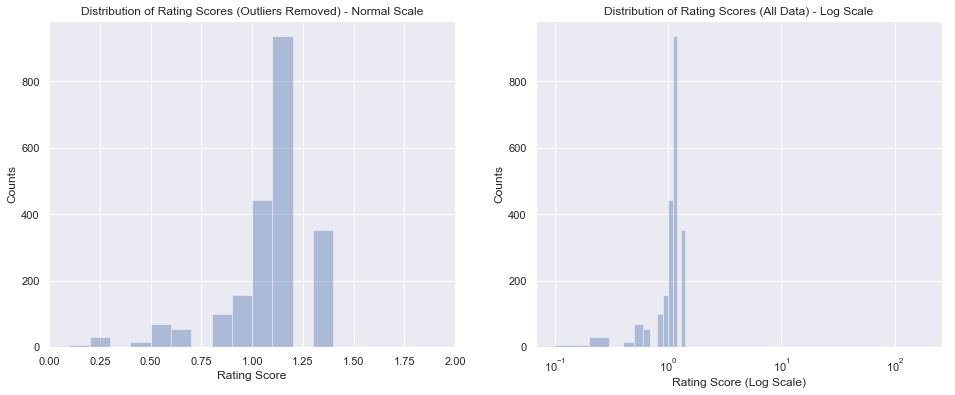

In [1598]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

p1 = sns.distplot(df_copy.rating_score, bins=np.arange(0, 2, 0.1), kde=False, ax=axes[0])
p1.set(xlim=(0, 2))
p1.set(xlabel='Rating Score', ylabel='Counts')
p1.set(title='Distribution of Rating Scores (Outliers Removed) - Normal Scale');

p2 = sns.distplot(df.rating_score, bins=np.arange(0, 180, 0.1), kde=False, ax=axes[1])
p2.set(xscale="log")
p2.set(xlabel='Rating Score (Log Scale)', ylabel='Counts')
p2.set(title='Distribution of Rating Scores (All Data) - Log Scale');

These outlier `rating_score`s were removed on the left plot: 7.5, 18.2, 42.0, 42.0, 66.6, 177.60. The remaining scores are clustered around 1.0 (10/10), though there are some > 1.0 due to WeRateDog's rating system. 

The right plot is a log scale histogram that shows the removed outliers were outside the main cluster around ${10^0}$ (1.0). The outliers are not visible since they are single counts compared to the 50+ counts for the more common scores. 

C:\Users\siorin\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


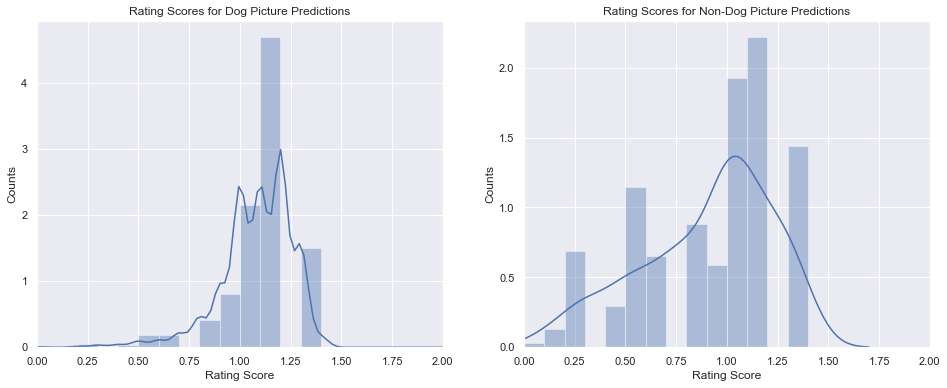

In [1599]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))

p3 = sns.distplot(df_copy[df_copy.predict_dog == True].rating_score, bins=np.arange(0, 2, 0.1), ax=axes[0])
p3.set(xlim=(0, 2))
p3.set(xlabel='Rating Score', ylabel='Counts')
p3.set(title='Rating Scores for Dog Picture Predictions');

p4 = sns.distplot(df_copy[df_copy.predict_dog == False].rating_score, bins=np.arange(0, 2, 0.1), ax=axes[1])
p4.set(xlim=(0, 2))
p4.set(xlabel='Rating Score', ylabel='Counts')
p4.set(title='Rating Scores for Non-Dog Picture Predictions');

There are more lower scores (< 1.0) for tweets with pictures predicted to be non-dogs, compared to tweets with pictures predicted to be dogs. 

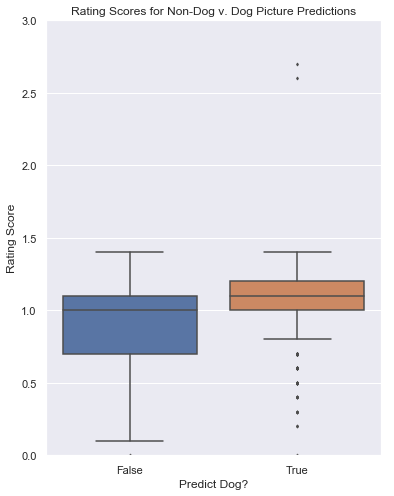

In [1601]:
f, axes = plt.subplots(1, 1, figsize=(6, 8))
p5 = sns.boxplot(x=df_copy.predict_dog, y=df_copy.rating_score, fliersize=2);
p5.set(ylim=(0, 3));
p5.set(xlabel='Predict Dog?', ylabel='Rating Score')
p5.set(title='Rating Scores for Non-Dog v. Dog Picture Predictions');

From the boxplot, we can see that when the image is predicted not to be a dog, the mean is 1.0 and the 25-75% percentiles are lower than when the image is predicted to be a dog, which have mean > 1.0

C:\Users\siorin\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


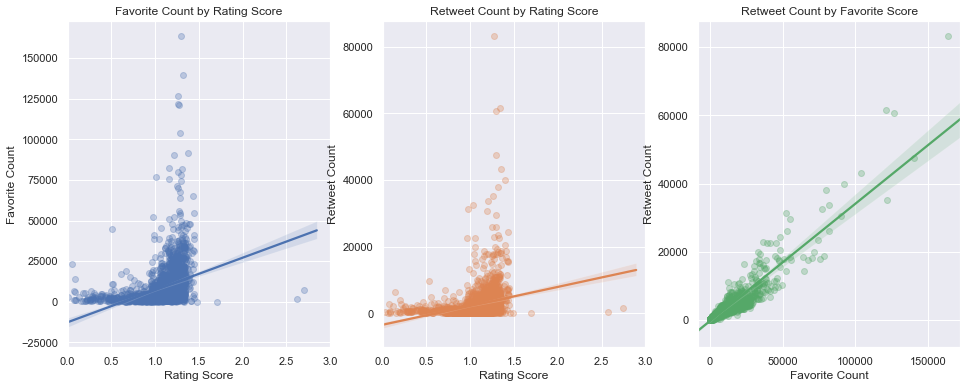

In [1602]:
f, axes = plt.subplots(1, 3, figsize=(16, 6))

p6 = sns.regplot(df_copy.rating_score, df_copy.favorite_count, 
                 ax=axes[0], x_jitter = 0.05, scatter_kws={'alpha':0.3})
p6.set(xlim=(0, 3))
p6.set(xlabel='Rating Score', ylabel='Favorite Count')
p6.set(title='Favorite Count by Rating Score');

p7 = sns.regplot(df_copy.rating_score, df_copy.retweet_count, 
                 ax=axes[1], x_jitter = 0.05, scatter_kws={'alpha':0.3})
p7.set(xlim=(0, 3))
p7.set(xlabel='Rating Score', ylabel='Retweet Count')
p7.set(title='Retweet Count by Rating Score');

p8 = sns.regplot(df_copy.favorite_count, df_copy.retweet_count, 
                 ax=axes[2], scatter_kws={'alpha':0.3})
p8.set(xlabel='Favorite Count', ylabel='Retweet Count')
p8.set(title='Retweet Count by Favorite Score');

There appears to be a weak-moderate positive correlation between Rating Score, and Favorite Count/Retweet Count. There is a strong positive correlation between Favorite Count and Retweet Count. 

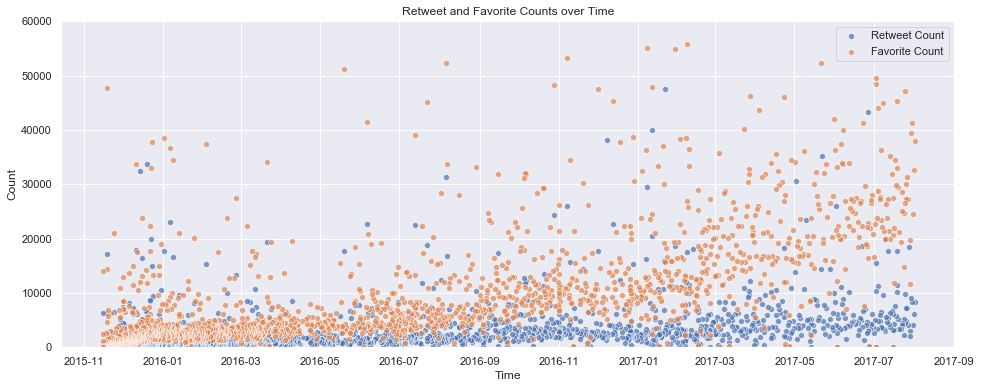

In [1603]:
f, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.scatterplot(df_copy.timestamp, df_copy.retweet_count, alpha=0.7)
sns.scatterplot(df_copy.timestamp, df_copy.favorite_count, alpha=0.7)
axes.set(xlim=('2015-10-15', '2017-09-01'), ylim=(0, 60000));
axes.legend(['Retweet Count', 'Favorite Count']);
axes.set(xlabel='Time', ylabel='Count');
axes.set(title='Retweet and Favorite Counts over Time');

Retweet counts very slightly increase, wherease Favorite counts increase more moderately over time.

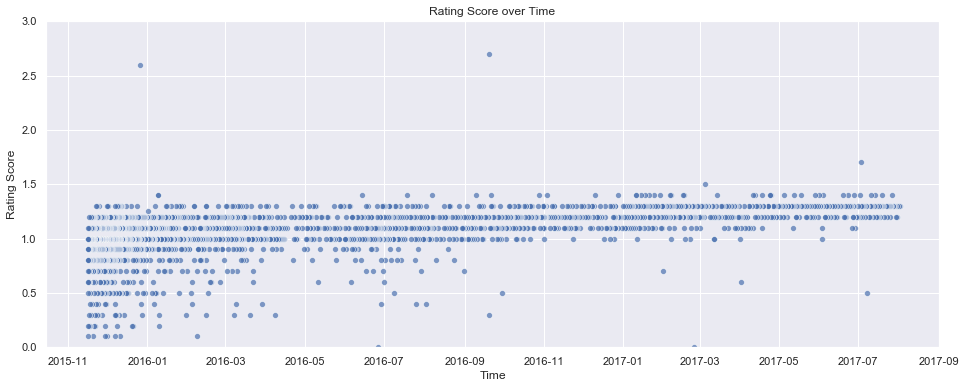

In [1604]:
f, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.scatterplot(df_copy.timestamp, df_copy.rating_score, alpha=0.7)
axes.set(xlim=('2015-10-15', '2017-09-01'), ylim=(0,3));
axes.set(xlabel='Time', ylabel='Rating Score');
axes.set(title='Rating Score over Time');

Lower rating scores tend to occur more often in past tweets (before 2016-10)

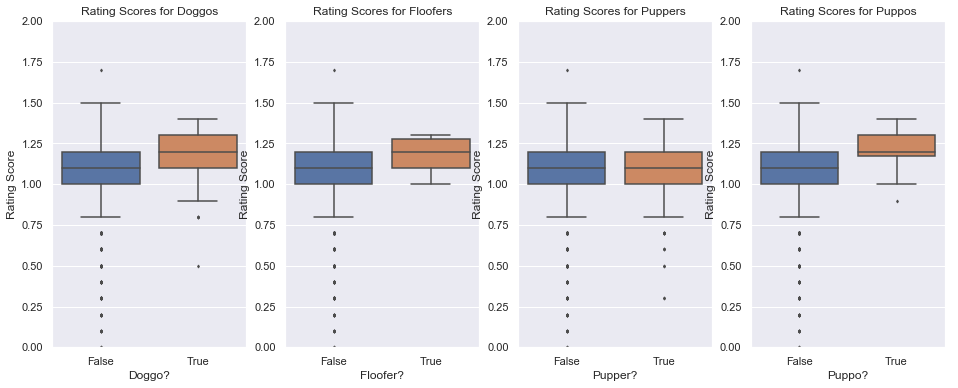

In [1605]:
f, axes = plt.subplots(1, 4, figsize=(16, 6))

g1 = sns.boxplot(x=df_copy.doggo, y=df_copy.rating_score, fliersize=2, ax=axes[0]);
g1.set(ylim=(0, 2));
g1.set(xlabel='Doggo?', ylabel='Rating Score')
g1.set(title='Rating Scores for Doggos');

g2 = sns.boxplot(x=df_copy.floofer, y=df_copy.rating_score, fliersize=2, ax=axes[1]);
g2.set(ylim=(0, 2));
g2.set(xlabel='Floofer?', ylabel='Rating Score')
g2.set(title='Rating Scores for Floofers');

g3 = sns.boxplot(x=df_copy.pupper, y=df_copy.rating_score, fliersize=2, ax=axes[2]);
g3.set(ylim=(0, 2));
g3.set(xlabel='Pupper?', ylabel='Rating Score')
g3.set(title='Rating Scores for Puppers');

g4 = sns.boxplot(x=df_copy.puppo, y=df_copy.rating_score, fliersize=2, ax=axes[3]);
g4.set(ylim=(0, 2));
g4.set(xlabel='Puppo?', ylabel='Rating Score')
g4.set(title='Rating Scores for Puppos');


Doggos and Floofers tend to have higher rating scores than Non-Doggos and Non-Floofers respectively. Puppers have about the same scores as Non-Puppers. Puppos have much higher scores than Non-Puppos.

In [1606]:
# best scoring dog types
df_copy[df_copy.predict_dog == True].groupby(['predict'])['rating_score'].mean().sort_values(ascending=False).head(10)

predict
clumber                 2.700000
Bouvier_des_Flandres    1.300000
Saluki                  1.250000
briard                  1.233333
Tibetan_mastiff         1.225000
Border_terrier          1.214286
standard_schnauzer      1.200000
silky_terrier           1.200000
Gordon_setter           1.175000
Irish_setter            1.175000
Name: rating_score, dtype: float64

In [1607]:
# worst scoring dog types
df_copy[df_copy.predict_dog == True].groupby(['predict'])['rating_score'].mean().sort_values(ascending=False).tail(10)

predict
miniature_schnauzer            0.960000
Dandie_Dinmont                 0.957143
Welsh_springer_spaniel         0.950000
Boston_bull                    0.941667
dalmatian                      0.933333
Tibetan_terrier                0.925000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
soft-coated_wheaten_terrier    0.880000
Japanese_spaniel               0.500000
Name: rating_score, dtype: float64

Breeds with best rating scores are: clumber, Bouvier_des_Flandres, Saluki, Pomeranian, briard. Worst rated dog types are: Japanese_spaniel, soft-coated_wheaten_terrier, Scotch_terrier, Walker_hound, Tibetan_terrier

In [1608]:
# best scoring not-dog types
df_copy[df_copy.predict_dog == False].groupby(['predict'])['rating_score'].mean().sort_values(ascending=False).head(10)

predict
pole           1.4
limousine      1.4
pedestal       1.4
prison         1.4
dough          1.3
fountain       1.3
street_sign    1.3
cliff          1.3
quilt          1.3
brown_bear     1.3
Name: rating_score, dtype: float64

In [1609]:
# worst scoring not-dog types
df_copy[df_copy.predict_dog == False].groupby(['predict'])['rating_score'].mean().sort_values(ascending=False).tail(10)

predict
snail            0.25
Angora           0.20
maze             0.20
scorpion         0.20
coho             0.20
slug             0.20
lacewing         0.10
electric_fan     0.10
paper_towel      0.10
traffic_light    0.00
Name: rating_score, dtype: float64

In [1610]:
df_copy[df_copy.predict == 'pole'].jpg_url

124    https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg
Name: jpg_url, dtype: object

In [1611]:
df_copy[df_copy.predict == 'dough'].jpg_url

1676    https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg
Name: jpg_url, dtype: object

For some reason, some non-dog categories such as 'pole' and 'dough' have high rating scores. Checking these images, the actual dogs are small in the pictures which is why they were misclassified. 

#### Remarks
- Some outliers of calculated rating scores (420/10, 666/10, 182/10, 1776/10, 75/10) which are likely memes/references (420, 666, 1776)
- The 99% percentile of calculated rating scores lie between [0.2, 1.4]
- When the image is predicted not to be a dog, the mean is 1.0 and the 25-75% percentiles are lower than when the image is predicted to be a dog, which has mean > 1.0
- There appears to be a weak-moderate positive correlation between Rating Score, and Favorite Count/Retweet Count. There is a strong positive correlation between Favorite Count and Retweet Count. 
- Retweet counts very slightly increase, wherease Favorite counts increase more moderately over time.
- Lower rating scores tend to occur more often in past tweets (before 2016-10)
- Doggos and Floofers tend to have higher rating scores than Non-Doggos and Non-Floofers respectively. Puppers have about the same scores as Non-Puppers. Puppos have much higher scores than Non-Puppos.
- Some non-dog categories such as pole and dough have high rating scores. Checking these images, the actual dogs are small in the pictures or they are dog-looking objects, which is why they were misclassified but still get good ratings. 

---

## References

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackoverflow.com/questions/40712178/reading-the-json-file-with-multiple-objects-in-python
- https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
- https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts
- https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
- https://stackoverflow.com/questions/36410075/select-rows-from-a-dataframe-based-on-multiple-values-in-a-column-in-pandas
- https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://stackoverflow.com/questions/6883049/regex-to-extract-urls-from-href-attribute-in-html-with-python
- https://stackoverflow.com/questions/36108377/how-to-use-the-split-function-on-every-row-in-a-dataframe-in-python
- https://stackoverflow.com/questions/8437964/python-printing-horizontally-rather-than-current-default-printing
- https://seaborn.pydata.org/generated/seaborn.distplot.html
- https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#log
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
- https://seaborn.pydata.org/generated/seaborn.boxplot.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.regplot.html
- https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha
- https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns
- https://stackoverflow.com/questions/44742945/i-applied-sum-on-a-groupby-and-i-want-to-sort-the-values-of-the-last-column
- https://seaborn.pydata.org/generated/seaborn.set.html
- https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer/34898976#34898976